# Digging into League of Legends

**Name**: Yihui Zhang

**Website Link**: https://onegrayz.github.io/League-of-Legends-Research-/

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

# from dsc80_utils import * # Feel free to uncomment and use this.

## Step 1: Introduction

League of Legends is a multiplayer online battle arena video game developed and published by Riot Games in 2009. This game is very popular worldwide. The format of the game is simply two teams play against each other which each team has 5 players. There are 5 roles for each team which are top line, jungle, mid line, bot line, and support. 

I played League of Legends for years, the first blood kill is a big thing for the game because it will give player advatanges in the game. If the player knows how to use his advatanges from the first blood, it will help the team to win much easier. My favorite position is jungle, so I am very curious in which jungle champion gets the first blood will increase team's win rate in the all professional league games. Some coach or players either play in the professional league or play in daily rank will like to know that so they can pick the right champion to help them win.

My dataset is on all of the professional League of Legends games that have taken place in 2024. The dataset contains 12 rows per game, one row per player and 2 rows of summary statistics (one for each team). 

The columns I am interested in to answer, “Which jungle champion gets the first blood kill will increase team's win rate” are: "result", "position", "champion", "firstbloodkill". I chose these columns because they showed me the result of the match, and which champion gets the first blood kill, which position gets the first blood kill. When we cleaned our data to isolate the games where soul appeared we had 27300 rows, and 4 columns.


#### Descriptions of Columns
- position: the position of game, top means top line, jng means jungle, mid means mid line, bot means bot line, and sup means support
- champion: the champion that the player picked 
- result: 0 means defeat, 1 means victory
- firstbooldkill: 0 means not got first blood kill, 1 means got first blood kill

## Step 2: Data Cleaning and Exploratory Data Analysis

### Raw Dataset

In [92]:
df = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10660-10660_game_1,partial,https://lpl.qq.com/es/stats.shtml?bmid=10660,DCup,2023,NaN,0,2024-01-01 05:13:15,1,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data cleaning:
First of all, I only gets the columns that helps to answer my question from the dataset which are 'position', 'champion', 'result', and 'firstbloodkill'. In the position columns, other than the 5 roles of the game which are top, jng, mid, bot, sup, there is another value called 'team' which I do not want. In addition, because I only care about the position, so I only have 'jng' in my position column. I also need to filter out the firstbloodkill column because I only care about the win rate when the champion got the first blood kill. I also realize that the 'result' and 'firstbloodkill' columns should be boolean values instead of integers, so I convert them to the right type. Then I check if there are any missing values now in each columns, and the output shows there is not empty cells in my dataset.

In [93]:
df = df[['position', 'champion', 'result', 'firstbloodkill']]
df.head()


,position,champion,result,firstbloodkill
0,top,Aatrox,0,0.0
1,jng,Maokai,0,0.0
2,mid,Orianna,0,0.0
3,bot,Kalista,0,0.0
4,sup,Senna,0,0.0


In [94]:
df = df[df['position'] == 'jng']
df = df[df['firstbloodkill'] == 1]
df['result'] = df['result'].apply(lambda x : bool(x))
df['firstbloodkill'] = df['firstbloodkill'].apply(lambda x : bool(x))
df

,position,champion,result,firstbloodkill
25,jng,Bel'Veth,True,True
37,jng,Jarvan IV,True,True
73,jng,Nocturne,True,True
85,jng,Jarvan IV,True,True
126,jng,Lee Sin,True,True
...,...,...,...,...
27181,jng,Nocturne,True,True
27229,jng,Viego,False,True
27253,jng,Viego,False,True
27265,jng,Taliyah,False,True


In [95]:
df.isna().sum()

position          0
champion          0
result            0
firstbloodkill    0
dtype: int64

### Univariate Analysis:
First, let's look at all jungle champions' win rate when by drawing graph. This pie graph shows that the win rate of all jungle champions when they get the firstblood. Based on this graph, when a jungle champion gets the first blood kill, the team will have almost 60% to win. 

In [96]:
df_plot_1 = df.copy()
df_plot_1['result'] = df_plot_1['result'].apply(lambda x: 'victory' if int(x) == 1 else 'defeat')
df_plot_1['firstbloodkill'] = df_plot_1['firstbloodkill'].apply(lambda x: int(x))
fig = px.pie(df_plot_1, values = 'firstbloodkill', names = 'result', title='Win Rate of Jungle Getting First Blood Kill')
fig.show()

### Bivariate Analysis:
Now let start exploring the question, "Which jungle champion gets the first blood kill will increase team's win rate". The first graph shows that the counts of each champion when gets the first blood kill and win the game. In this graph, the champion who gets the most win when has the first blood kill is Xin Zhao. The second graph shows that the win rate of each champion when gets the first blood. In this graph, there are some champions have the 100% win rate which means if they get the first blood in the game, they must win the game.

In [97]:
df_plot_2 = df.copy()
df_plot_2 = df_plot_2.groupby('champion').sum() 
fig = px.bar(df_plot_2, y = 'result', title='Number of Times of Each Jungle Champion When Gets the First Blood and Win The Game')
fig.show()

In [98]:
df_plot_3 = df_plot_2.copy()
df_plot_3['win rate'] = df_plot_3['result'] / df_plot_3['firstbloodkill']
fig = px.bar(df_plot_3, y = 'win rate', title='Win Rate of Each Jungle Champion When Gets the First Blood')
fig.show()

### Interesting Aggregates:
This groupby() shows 3 important values. The sum column describes the counts of getting the first blood and win the game for each champion. The count column describes the counts of getting the first blood in total for each champion. The mean column describes the win rate of each champion of getting the first blood and win the game. Now you might find out that the champion with the highest win rate such as 1 has low counts for getting the first blood. In addition, the champion with the lowest win rate such as 0 also has low counts for getting the first blood. 

In [102]:
df.groupby('champion')['result'].agg(['sum','count', 'mean'])

,sum,count,mean
champion,,,
Amumu,0,1,0.000000
Bel'Veth,8,12,0.666667
Brand,12,18,0.666667
Diana,0,2,0.000000
Fiddlesticks,1,1,1.000000
Gragas,2,4,0.500000
Graves,7,11,0.636364
Ivern,4,7,0.571429
Jarvan IV,9,16,0.562500


## Step 3: Assessment of Missingness

### NMAR Analysis:
I do believe that there are many columns in my data are Not Missing At Random (NMAR). In my data, since there are 10 players in each game, after every other 10 rows, there always are 2 rows which records the each team's data instead of indivdual player's data. Beacuse of this recording format, many columns have missing values in the rows of team. 

In my case, the data of 'firstbloodkill' is missing under rows which recrod team data, I think this is NMAR because the 'firstbloodkill' refers which champion and position gets the kill instead of the whole team, and there is another column that records which team gets the first blood. However, I realize there is a column called 'firstbloodassist' which records which champion and position is involved in the first blood but not taking the kill. This columns is missing also under team rows, but there are some missingness under player rows as well. It is not MD again because it cannot infer this column’s missingness exactly from anothers such as 'firstbloodkill' column. 



### Missingness Dependency:
I observed that some of the games do not record the information of 'firstbloodassist', and based on this fact, I think the missingness of 'firstbloodassist' is dependent on the 'league' column. Therefore, I will use the total variation distance to determine whether it is Missing at Random (MAR) or Missing Complete at Random (MCAR). 

In [84]:
df2 = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')
df2 = df2[['league', 'position','firstbloodassist']]
df2 = df2[df2['position'] != 'team']
df2['assist_missing'] = df2['firstbloodassist'].isna()
df2

,league,position,firstbloodassist,assist_missing
0,DCup,top,NaN,True
1,DCup,jng,NaN,True
2,DCup,mid,NaN,True
3,DCup,bot,NaN,True
4,DCup,sup,NaN,True
...,...,...,...,...
27293,LPLOL,top,0.0,False
27294,LPLOL,jng,0.0,False
27295,LPLOL,mid,0.0,False
27296,LPLOL,bot,0.0,False


In [89]:
league_dist = (
    df2
    .assign(assist_missing=df2['firstbloodassist'].isna())
    .pivot_table(index='league', columns='assist_missing', aggfunc='size')
)
league_dist.columns = ['assist_missing = False', 'assist_missing = True']
league_dist = (league_dist / league_dist.sum()).fillna(0)
league_dist

,assist_missing = False,assist_missing = True
league,,
AL,0.019282,0.000000
CBLOL,0.037493,0.000000
CBLOLA,0.032137,0.000000
DCup,0.000000,0.044118
EBL,0.027317,0.000000
ESLOL,0.028923,0.000000
GLL,0.025174,0.000000
HC,0.008570,0.000000
HM,0.026245,0.000000


In [258]:
#Simulation
n_repetitions = 1000
shuffled = df2.copy()
tvds = []
for _ in range(n_repetitions):
    shuffled['league'] = np.random.permutation(shuffled['league'])
    # Computing and storing the TVD.
    pivoted = (
        shuffled
        .pivot_table(index='league', columns='assist_missing', aggfunc='size')
    )
    pivoted = pivoted / pivoted.sum()
    tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)
#Observed_tvd
observed_tvd = league_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
#Graph
fig = px.histogram(pd.DataFrame(tvds), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig.add_vline(x=observed_tvd, line_color='red')
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed_tvd, 2)}</span>',
                   x= -0.1 + observed_tvd, showarrow=False, y=0.08)
fig.update_layout(yaxis_range=[0, 0.1])


In [106]:
(np.array(tvds) >= observed_tvd).mean()

0.0

The observed statistic was: 1

The p-value was:0.0

The empirical distribution of the test statistic is the graph showed above.

Since the p-value was close to 0, the missingness of 'firstkillassist' depends on 'league' which is MAR.

Now let's check if there is any missing relationshiip between the 'side' which is the game side (red or blue) of the game that the team picks and 'firstbloodassist'. 

In [122]:
df3 = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')
df3 = df3[['side', 'position','firstbloodassist']]
df3 = df3[df3['position'] != 'team']
df3['assist_missing'] = df2['firstbloodassist'].isna()
df3

,side,position,firstbloodassist,assist_missing
0,Blue,top,NaN,True
1,Blue,jng,NaN,True
2,Blue,mid,NaN,True
3,Blue,bot,NaN,True
4,Blue,sup,NaN,True
...,...,...,...,...
27293,Red,top,0.0,False
27294,Red,jng,0.0,False
27295,Red,mid,0.0,False
27296,Red,bot,0.0,False


In [133]:
patch_dist = (
    df3
    .assign(assist_missing=df2['firstbloodassist'].isna())
    .pivot_table(index='side', columns='assist_missing', aggfunc='size')
)
patch_dist.columns = ['assist_missing = False', 'assist_missing = True']
patch_dist = (patch_dist / patch_dist.sum()).fillna(0)
patch_dist

,assist_missing = False,assist_missing = True
side,,
Blue,0.5,0.5
Red,0.5,0.5


In [259]:
#Simulation
n_repetitions = 1000
shuffled = df3.copy()
tvds = []
for _ in range(n_repetitions):
    shuffled['side'] = np.random.permutation(shuffled['side'])
    # Computing and storing the TVD.
    pivoted = (
        shuffled
        .pivot_table(index='side', columns='assist_missing', aggfunc='size')
    )
    pivoted = pivoted / pivoted.sum()
    tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)
#Observed_tvd
observed_tvd = patch_dist.diff(axis=1).iloc[:, -1].abs().sum() / 2
#Graph
fig = px.histogram(pd.DataFrame(tvds), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the TVD')
fig.add_vline(x=observed_tvd, line_color='red')
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed_tvd, 2)}</span>',
                   x=0.003 + observed_tvd, showarrow=False, y=0.14)
fig.update_layout(yaxis_range=[0, 0.15])

In [147]:
(np.array(tvds) >= observed_tvd).mean()

1.0

The observed statistic was: 0

The p-value was: 1.0

The empirical distribution of the test statistic is the graph showed above.

Since the p-value was close to 1, the missingness of 'firstkillassist' not depends on 'league' which is MCAR.

## Step 4: Hypothesis Testing

In this part, I will use the columns 'position', 'result', and 'firstbloodkill' from the dataset.

Null Hypothesis: The win rate of the jungle position gets the firstbloodkill is the same as the win rate of the jungle position not gets the firstbloodkill.

Alternate Hypothesis: The win rate of the jungle position gets the firstbloodkill is different to the win rate of the jungle position not gets the firstbloodkill.

Test Statistic: I choose the difference between the jungle position gets the firstbloodkill and won and the jungle position not gets the firstbloodkill and won which is Total Variation Distance (TVD).

Significance Level: I choose 5% which is the most common significance level.


In [197]:
df4 = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')
df4 = df4[['position', 'result', 'firstbloodkill']]
df4 = df4[(df4['position'] == 'jng')]
df4['firstbloodkill'] = df4['firstbloodkill'].apply(lambda x : bool(x))
df4

,position,result,firstbloodkill
1,jng,0,False
6,jng,1,False
13,jng,0,False
18,jng,1,False
25,jng,1,True
...,...,...,...
27270,jng,1,False
27277,jng,0,False
27282,jng,1,True
27289,jng,1,False


In [285]:
win_dist = df4.copy()
win_dist = win_dist.groupby('firstbloodkill').sum()['result']
win_dist = win_dist / win_dist.sum()
observed = win_dist.diff().abs().sum() / 2
observed

0.3324538258575198

In [289]:
n_repetitions = 1000
differences = []
for _ in range(n_repetitions):
    # Step 1: Shuffle the weights and store them in a DataFrame.
    with_shuffled = df4.assign(Shuffled_result=np.random.permutation(df4['result']))
    # Step 2: Compute the test statistic.
    # Remember, False (0) comes before True (1),
    # so this computes True - False.
    dif = with_shuffled.groupby('firstbloodkill').sum()['Shuffled_result']
    dif = dif / dif.sum()
    difference = dif.diff().abs().sum() / 2
    # Step 4: Store the result
    differences.append(difference)

fig = px.histogram(pd.DataFrame(differences), x=0, nbins=50, histnorm='probability', 
                   title='Empirical Distribution of the Observed Statistic')
fig.add_vline(x=observed, line_color='red')
fig.add_annotation(text=f'<span style="color:red">Observed TVD = {round(observed, 2)}</span>',
                   x= 0.005 + observed, showarrow=False, y=0.1)
fig.update_layout(yaxis_range=[0, 0.12])


In [290]:
(np.array(differences) >= observed).mean()

1.0

Because the p-value is 1, I fail to reject the null hypothesis that the win rate of the jungle position gets the firstbloodkill is the same as the win rate of the jungle position not gets the firstbloodkill. This answers my questiion because it shows that the relationship between jungle gets the first blood kill and the result of team wnning is not very clear. The jungle gets the first blood might not impact the game result at all. 


## Step 5: Framing a Prediction Problem

Based on the Hypothesis test, we might conclude that the benefits for jungle taking the first blood kill will not increase the team win rate by a lot. Then it leads to another interesting question. If jungle will not increase the team win rate by taking first blood kill, is there such a position increase the team win rate by taking the first blood? In other words, which position gets the first blood kill, the team is most likely to win the game. 

Therefore, now let's try predict if a team will win or lose a game when different position gets the first blood kill. I will do a multiclass classification since there are 5 different types of position. I will choose predict output of 'result' which indicates the result of the game because most people care about winning while they are playing. I will use accuracy to evaluate my model because the idea of this model is to tell people when a type of position gets the first blood, their team are likely to win or not. If the accuracy is the least thing that I care about, it will be no difference of guessing the result than predicting the result by running the model. I use regession model first. 

In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [110]:
df5 = pd.read_csv('2024_LoL_esports_match_data_from_OraclesElixir.csv')
df5 = df5[['side', 'position', 'kills', 'firstbloodkill', 'result']]
df5 = df5[df5['position'] != 'team']
df5_X = df5[['side', 'position', 'kills', 'firstbloodkill']]
X_train, X_test, y_train, y_test = train_test_split(df5_X, df5['result'], test_size=0.25, random_state=13)

## Step 6: Baseline Model

My base model has two predictors which are 'position' and 'firstbloodkill' columns. The 'position' is nominal since there are 5 positions and connot be compared. The 'firstbloodkill' is quantitative which indicates whether this position gets the first blood kill in the game. The output for my model is 'result' which is quantitative indicates the result of the game. 

In the beginning, I get the needed data from dataset, and then use train test split to get my train set and test set with which the test size is 25%. Because the 'position' is nonminal, I apply the ColumnTransformer to transform 'position' by using OneHotEncoder, and 'firstbloodkill' by using StandardScaler. Next, I just called a LinearRegression and fits the train set into my model. After fitting, I use score method to check the accuracy of my train and test set. This method calculate the value of R^2 of the model. I found out this model is not doing good because the R^2 is 0.0037852165311508257 for trian set, and 0.004114362110160696 for test set which is far from 1 which means the linear does not fit well. 

In [108]:
preproc = ColumnTransformer(
    transformers=[
        ('categorical_cols', OneHotEncoder(), ['position']),
        ('StandardScaler', StandardScaler(), ['firstbloodkill'])
    ],
    remainder='drop' # Specify what to do with all other columns ('total_bill' here) – drop or passthrough.
)
base_model = Pipeline([
    ('preproc', preproc),
    ('lin_reg', LinearRegression()),
    ])
base_model.fit(X_train, y_train)
base_model.score(X_train, y_train), base_model.score(X_test, y_test)

(0.003785512662262125, 0.004105817212896934)

## Step 7: Final Model

In order to improve my model. I start by adding more features. I add 'side' and 'kills' columns. The 'side' is nominal which indicates the game side of position which is either red or blue. I think this factor will help my model because the game map in League of Legends is not symmetry. The side red starts at top right, but the side blue starts at bottom left. Therefore, there are some place can be reached easily by one side than another which makes the benefit side more likely to get a kill. The 'kills' is quantitative which indicates the the total kills of that position got in the game. I think this factor matters because after a position gets the first blood, it will have more power which makes them most likely to get the kills again. In the game, more kills means more money means more items means more damage means more likely to win. 

Similiar to my base model, I do the same for 'position' and 'firstbloodkill', but I also OneHotEncoder 'side', and also StanardScaler 'kills'. After all ColumnTransforms, I fits a linear reggression into my data, and then check the accuracy. This time, the R^2 is 0.15981344297856914 for the train set, and 0.15531338549828344 for the test set. The accuracy is much better than my base model which increse about 15.5%. However, in general, the model is still not doing well. 


In [112]:
preproc = ColumnTransformer(
    transformers=[
        ('categorical_cols', OneHotEncoder(), ['side', 'position']),
        ('StandardScaler', StandardScaler(), ['kills', 'firstbloodkill'])
    ],
    remainder='passthrough' # Specify what to do with all other columns ('total_bill' here) – drop or passthrough.
)
improved_model = Pipeline([
    ('preproc', preproc),
    ('lin_reg', LinearRegression()),
    ])
improved_model.fit(X_train, y_train)
improved_model.score(X_train, y_train), improved_model.score(X_test, y_test)

(0.15981344297856914, 0.15531338549828344)

Therefore, I start using hyperparameters to determine if it will improve my model. I create 2 empty list which are going to help me to find the hyperparameter that leads to the best test set performance. I run a for loop which range from 1 to 6 as my polynomial degree. 

After the for loop, I find out that when the degree is 2 the test error is the lowest, so I choose degree of 2 and use it to fit my train set again. This time, I get R^2 of 0.17695699054777625 for the train set, and 0.15531338549828344 for the test set. This model only improve the train set by about 2% and not improve test set at all. 

In [113]:
train_errs = []
test_errs = []
for d in range(1, 7):
    pl = Pipeline([
    ('preproc', preproc),
    ('poly', PolynomialFeatures(d)),
    ('lin_reg', LinearRegression()),
    ])
    pl.fit(X_train, y_train)
    train_errs.append(mean_squared_error(y_train, pl.predict(X_train), squared=False))
    test_errs.append(mean_squared_error(y_test, pl.predict(X_test), squared=False))
errs = pd.DataFrame({'Train Error': train_errs, 'Test Error': test_errs})
errs


,Train Error,Test Error
0,0.458283,0.459618
1,0.453608,0.455157
2,0.453243,0.455047
3,0.453103,0.455270
4,0.453344,0.458724
5,0.452370,0.465876


In [116]:
fig = px.line(errs)
fig.update_layout(showlegend=True, xaxis_title='Polynomial Degree', yaxis_title='RMSE')

In [128]:
pl = Pipeline([
    ('preproc', preproc),
    ('poly', PolynomialFeatures(errs['Test Error'].idxmin())),
    ('lin_reg', LinearRegression()),
    ])
pl.fit(X_train, y_train)
pl.score(X_train, y_train), improved_model.score(X_test, y_test)

(0.17695699054777625, 0.15531338549828344)

The model is still not doing well, so I decide to get DecisionTreeClassifier a try. Because DecisionTreeClassifier cannot handle any nominal and ordinal values, I transform my X trian and test by using the ColumnTransformer which I mentioned before. Then, I create a DecisionTreeClassifier, and run a for loop in range 1 to 20 for tree depth to determine which tree depth is best fit. 

After the loop, the value of accuracy stops changing after tree's depth is 14, so I make my DecisionTreeClassifier has the max depth of 14. This time, the R^2 is 0.6782909389286133 for train set, and 0.6729957805907173 for test set. It is a huge improvment model which increase the accuracy for about 50%. Although the accuracy still not reach above 80%, I still thing this is a good model since it improved a lot. Finally, I find a model that can be used. 

In [129]:
X1 = pl.named_steps['preproc'].transform(X_train)
X2 = pl.named_steps['preproc'].transform(X_test)

In [131]:
acc = []
for d in range(1,21):
    dt = DecisionTreeClassifier(max_depth=d, criterion='entropy')
    dt.fit(X1, y_train)
    acc.append([d, dt.score(X1, y_train), dt.score(X2, y_test)])
acc

[[1, 0.6518579299027077, 0.6520745428973277],
 [2, 0.6518579299027077, 0.6520745428973277],
 [3, 0.6622904700504044, 0.6633263009845288],
 [4, 0.6654553979603798, 0.6691279887482419],
 [5, 0.6724885710936584, 0.6747538677918424],
 [6, 0.6738365959442035, 0.6728199718706048],
 [7, 0.6763568163169617, 0.6744022503516175],
 [8, 0.6777634509436173, 0.6766877637130801],
 [9, 0.6781151096002813, 0.6731715893108298],
 [10, 0.6781151096002813, 0.6731715893108298],
 [11, 0.6781151096002813, 0.6729957805907173],
 [12, 0.6781151096002813, 0.6731715893108298],
 [13, 0.6782323291525026, 0.6729957805907173],
 [14, 0.6782909389286133, 0.6729957805907173],
 [15, 0.6782909389286133, 0.6729957805907173],
 [16, 0.6782909389286133, 0.6729957805907173],
 [17, 0.6782909389286133, 0.6729957805907173],
 [18, 0.6782909389286133, 0.6729957805907173],
 [19, 0.6782909389286133, 0.6729957805907173],
 [20, 0.6782909389286133, 0.6729957805907173]]

In [141]:
dt = DecisionTreeClassifier(max_depth=14, criterion='entropy')
dt.fit(X1, y_train)
dt.score(X1, y_train), dt.score(X2, y_test)

(0.6782909389286133, 0.6729957805907173)

## Step 8: Fairness Analysis

In League of Legends, if you get the eighth kill and after every kill that you get, the system will display that you are legendary to other players instead of just saying you killed a enemy champion. In order to perform a fairness analysis and this game setting, I make 2 group, the first group is a position gets at least 8 kills in the game, and another group will be the rest. 

C: Our desicion tree classifier (1 if win the game, 0 if lose the game)

A: Whether or not it was legendary (has at least 8 kills) (1 if true, 0 if false).

From the observed stats, the winning rate of a position is legendary is 0.997268, and the winning rate of a position is not legendary is 0.421270. Now, let's compute the accuracy of C in each group. If these two numbers are the same, C achieves accuracy parity. However, it has False for 0.660090, and True for 0.860656.


(0.6843114691215957, 0.6323998582063098)

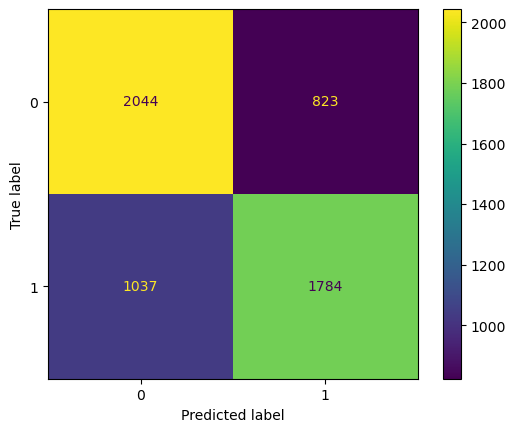

In [146]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dt, X2, y_test)
y_pred = dt.predict(X2)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision, recall

In [165]:
results = X_test
results['true_result'] = y_test
results['pred_result'] = y_pred
results['Legendary'] = (results['kills'] >= 8)
results.groupby('Legendary')['pred_result'].mean()

Legendary
False    0.421270
True     0.997268
Name: pred_result, dtype: float64

In [166]:
compute_accuracy = lambda x: metrics.accuracy_score(x['true_result'], x['pred_result'])
(
    results
    .groupby('Legendary')
    .apply(compute_accuracy)
    .rename('accuracy')
)

Legendary
False    0.660090
True     0.860656
Name: accuracy, dtype: float64

Let's run a permutation test to see if the difference in accuracy is significant.

Null Hypothesis: The classifier's accuracy is the same for both who is legendary and who is not legendary, and any differences are due to chance.

Alternative Hypothesis: The classifier's accuracy is higher for who is not legendary.

Test statistic: Difference in accuracy (True minus False).

Significance level: 0.05

Since the p-value is less than my significance level, I reject the null hypothesis.

In [172]:
obs = results.groupby('Legendary').apply(compute_accuracy).diff().iloc[-1]
diff_in_acc = []
for _ in range(1000):
    s = (
        results[['Legendary', 'pred_result', 'true_result']]
        .assign(Legendary=np.random.permutation(results['Legendary']))
        .groupby('Legendary')
        .apply(compute_accuracy)
        .diff()
        .iloc[-1]
    )
    
    diff_in_acc.append(s)
fig = pd.Series(diff_in_acc).plot(kind='hist', histnorm='probability', nbins=20,
                            title='Difference in Accuracy (Legendary -  not Legendary)')
fig.add_vline(x=obs, line_color='red')
fig.add_annotation(text=f'<span style="color:red">Observed = {round(obs, 2)}</span>',
                   x= -0.02 + obs, showarrow=False, y=0.15)

In [179]:
(diff_in_acc >= obs).mean()

0.0